# Exploration of Classic Riemannian Methods
In this notebook, we will explore Riemannian classification techiniques on covariance matrices.<br>
We will try k-NN, R-MDM and SVM on the data, using covariance estimators such as LWF.<br>
Also, we will explore preprocessing such as xDAWN.

In [2]:
#Lib
import sys
sys.path.append("/home/rffl/files/eegconv/k-class")

import pyriemann as rmn
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import kclass_lsubgen
import matplotlib.pyplot as plt

In [7]:
# Parameters
classvec = [i+1 for i in range(5)]
subvec = [i+1 for i in range(10)]
prop = 0.75
metric = "riemann"
estimator = "lwf"
xDAWN_filters = 5

## Data processing

### Data generation

In [8]:
train_path, test_path = kclass_lsubgen.generatedataset(classvec, subvec, prop, False)

# Data vectors
X_train = np.load(train_path, allow_pickle=True) # signals
X_test  = np.load(test_path, allow_pickle=True)
y_train = np.array([])           # labels
part = len(X_train) // len(classvec)
for i in range(len(classvec)):
    y_train = np.concatenate([y_train, i * np.ones(part, dtype=np.int64)])

y_test = np.array([])
part = len(X_test) // len(classvec)
for i in range(len(classvec)):
    y_test = np.concatenate([y_test, i * np.ones(part, dtype=np.int64)])

Saved ./kclass-lsubtrain.npy shape = (3000, 17, 100)
Saved ./kclass-lsubtest.npy shape = (1000, 17, 100)


### Data processing - Regular Covariance

In [ ]:
cov = rmn.estimation.Covariances(estimator=estimator)
X_train_cov = cov.fit_transform(X_train)
X_test_cov = cov.transform(X_test)

### Data Processing - XDawn

In [9]:
cov = rmn.estimation.XdawnCovariances(nfilter=xDAWN_filters, estimator=estimator)
X_train_cov = cov.fit_transform(X_train, y_train)
X_test_cov = cov.transform(X_test)

## Algorithms

### MDM

Acc 0.323


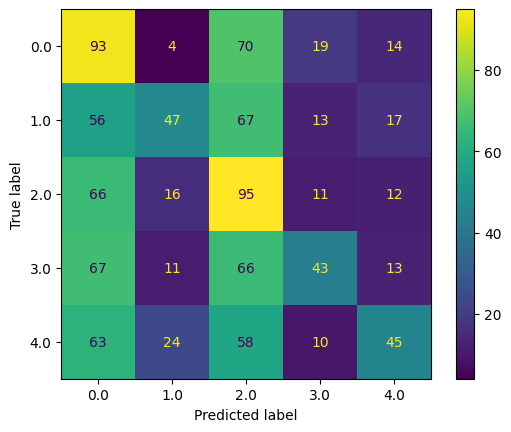

In [12]:
classifier = rmn.classification.MDM(metric=metric)
classifier.fit(X_train_cov, y_train)
y_pred = classifier.predict(X_test_cov)

corr = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        corr += 1

print("Acc " + str(corr/len(y_pred)))
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

### K-NN

In [ ]:
classifier = rmn.classification.KNearestNeighbor(3, metric)
classifier.fit(X_train_cov, y_train)
y_pred = classifier.predict(X_test_cov)

corr = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        corr += 1

print("Acc " + str(corr/len(y_pred)))
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

### SVM

Acc 0.577


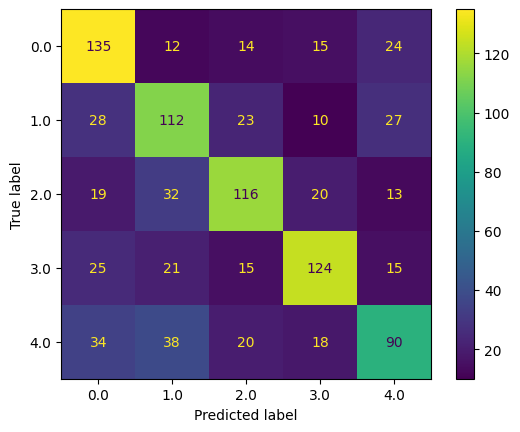

In [10]:
# OvO
classifier = sklearn.svm.SVC(kernel="linear")
X_tang_train = rmn.tangentspace.TangentSpace(metric=metric).fit_transform(X_train_cov)
X_tang_test = rmn.tangentspace.TangentSpace(metric=metric).fit_transform(X_test_cov)
classifier.fit(X_tang_train, y_train)
y_pred = classifier.predict(X_tang_test)

corr = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        corr += 1

print("Acc " + str(corr/len(y_pred)))
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

Acc 0.621


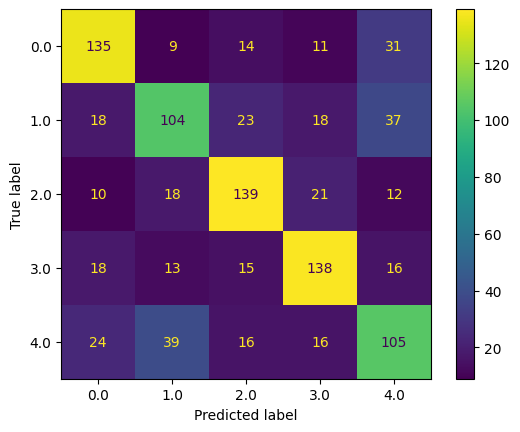

In [11]:
# OvA
classifier = sklearn.svm.LinearSVC()
X_tang_train = rmn.tangentspace.TangentSpace(metric=metric).fit_transform(X_train_cov)
X_tang_test = rmn.tangentspace.TangentSpace(metric=metric).fit_transform(X_test_cov)
classifier.fit(X_tang_train, y_train)
y_pred = classifier.predict(X_tang_test)

corr = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        corr += 1

print("Acc " + str(corr/len(y_pred)))

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()